In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the dataset
df_raw = pd.read_csv('../Dataset/social motive/Master Data Files/Data_GlobalFM_Master_2022-05-17.csv')

In [ ]:
#target variable
target='swls'
#Satisfaction with life composite

#numerical variables
social_motives = ['SPO','DIS', 'AFG','AFI','AFX','STA','MAT','MRB','MRT', 'KCF', 'KCC']
#Self-protection (SPO), Disease Avoidance (DIS), Affiliation (Group) (AFG), Affiliation (Independence) (AFI), Affiliation (Exclusion Concern) (AFX), Status (STA), Mate Seeking (MAT), Breakup Concern (MRB), Mate Retention (MRT), Kin Care (Family) (KCF), Kin Care (Children) (KCC).
learn_social_motives = [f'learn{sm}' for sm in social_motives]
#"how interested you would be in learning about ..."

not_motives_numerical_vars=['SubjSES', 'Age', 'Children', 'Food', 'Water', 'Sleep', 'Temperature', 'Safe']
#Food, Water, Sleep, Temperature, Safe scores
#food as example, "I usually had enough food to eat."
numerical_vars = not_motives_numerical_vars + social_motives + learn_social_motives


#categorical variables
categorical_vars=["Gender", "Relationship",'Country', 'wave', ]
# Gender: 0=Male, 1=Female
# Relationship: 1='Single and not currently dating', 2='Single and currently dating', 3='In a committed relationship', 4='Married', 5='Divorced/Widowed'
# Country: country name
# wave: there are 2 waves, wave 1 (2016-2019, pre-pandemic) and wave 2 (2020, mid-pandemic)

#note in the original dataset, there is a categorical variable called 'BirthCountry', which is the country of birth. But I noticed that the record manner of 'BirthCountry' is not consistent across the waves, and there is no explanation for this inconsistency. So I decided to exclude it.

In [ ]:
# Exclude invalid data
df_raw = df_raw[df_raw['filter_exclude'] == 1]#in this dataset, filter_exclude=1 means the data is valid

# Rename N.Children and country.N, and masterID
df_raw = df_raw.rename(columns={'N.Children': 'Children', 'country.N': 'Country', 'masterID': 'ID'})

# Ensure all numerical variables and target are numeric
df_raw[numerical_vars] = df_raw[numerical_vars].apply(pd.to_numeric, errors='coerce')
df_raw[target] = df_raw[target].apply(pd.to_numeric, errors='coerce')

# Recode categorical variables for intuitive interpretation
df_raw['Gender'] = df_raw['Gender'].map({'0': 'Male', '1': 'Female', '2': 'Other'})
df_raw['Relationship'] = df_raw['Relationship'].map({'1': 'Single', '2': 'Dating', '3': 'Relationship', '4': 'Married', '5': 'Divorced/Widowed'})
df_raw['wave'] = df_raw['wave'].map({1: 'Pre-pandemic', 2: 'Pandemic'})

# Select only columns in numerical_vars, categorical, and target (as well as ID)
selected_columns = [target]+ numerical_vars + categorical_vars + ["ID"]
df_raw = df_raw[selected_columns]

#since only wave2 has swls, I will drop the wave1 data
df_raw = df_raw[df_raw['wave'] == 'Pandemic']

In [ ]:
def examine_missing_values(df):
    # Calculate missing value percentages for each column
    nan_counts = df.isna().sum()
    nan_percentages = (nan_counts / len(df) * 100).round(2)
    nan_percentages = nan_percentages[nan_percentages > 0]
    if len(nan_percentages) == 0:
        print("\nNo missing values found.")
    else:
        print("\nMissing values percentage per column:")
        print(nan_percentages.apply(lambda x: f"{x}%"))
    print("\nTotal observations:", len(df))

print("Before handling missing values:")
examine_missing_values(df_raw)


#Note that KCC (75.38%), MRT (43.69%) and MRB (43.56%) have high missing value rates, which are much higher than other variables (most of them are around 20%).

Before handling missing values:

Missing values percentage per column:
swls             8.47%
SubjSES           6.9%
Age              8.33%
Children          6.4%
Food             9.06%
Water            9.04%
Sleep            9.05%
Temperature      9.05%
Safe             9.06%
MRB             43.56%
MRT             43.69%
KCC             75.38%
learnSPO        22.63%
learnDIS        22.63%
learnAFG        22.73%
learnAFI        22.61%
learnAFX         22.6%
learnSTA        22.65%
learnMAT        22.71%
learnMRB        22.71%
learnMRT        22.71%
learnKCF        22.54%
learnKCC        23.09%
Gender           6.23%
Relationship     6.12%
dtype: object

Total observations: 6917


In [ ]:
#It is reasonable for these variables to have a high missing value rate, because they only apply to a small subset of people who have children (KCC) or in relationships (MRT, MRB).

# The proportion of respondents without children
num_without_children = len(df_raw[df_raw['Children'] == 0])
total_respondents = len(df_raw)
percent_without_children = (num_without_children / total_respondents * 100)
print(f"\nRespondents without children: {num_without_children} ({percent_without_children:.2f}% of total)")
# Compared with the missing rate of KCC
kcc_missing = df_raw['KCC'].isna().sum()
kcc_missing_rate = (kcc_missing / len(df_raw) * 100)
print(f"\nKCC missing rate: {kcc_missing_rate:.2f}%")

# The proportion of respondents not in relationships
not_in_relationship = ~df_raw['Relationship'].isin(['Dating', 'Relationship', 'Married'])
num_not_in_relationship = not_in_relationship.sum()
percent_not_in_relationship = (num_not_in_relationship / total_respondents * 100)

print(f"\nRespondents not in relationships (Single/Divorced/Widowed): {num_not_in_relationship} ({percent_not_in_relationship:.2f}% of total)")
# Compared with the missing rate of MRT
mrt_missing = df_raw['MRT'].isna().sum()
mrt_missing_rate = (mrt_missing / len(df_raw) * 100)
print(f"\nMRT missing rate: {mrt_missing_rate:.2f}%")
# Compared with the missing rate of MRB
mrb_missing = df_raw['MRB'].isna().sum()
mrb_missing_rate = (mrb_missing / len(df_raw) * 100)
print(f"\nMRB missing rate: {mrb_missing_rate:.2f}%")


Respondents without children: 5204 (75.23% of total)

KCC missing rate: 75.38%

Respondents not in relationships (Single/Divorced/Widowed): 2950 (42.65% of total)

MRT missing rate: 43.69%

MRB missing rate: 43.56%


In [ ]:
#If retain these variables (KCC, MRT, MRB) and deal with missing values: 
# (taking KCC, having children as an example)

# First, considering the heterogeneity of the sample:
#1. Directly delete the missing rows: then the remaining samples are all people with children, which leads to sample bias.

#2. Fill in the missing values: completely use samples with children to fill in samples without children, which is not reasonable. (we don't have any KCC data for people without children, thus can't impute)

# In addition, since there are too many missing values in these variables, deleting rows will significantly reduce the sample size, and filling them will also have poor performance. 

# Therefore, I directly exclude these three social motives (KCC, MRT, MRB).
drop_vars = ['KCC','MRT','MRB']
numerical_vars = [v for v in numerical_vars if v not in drop_vars]
df_raw = df_raw.drop(columns=drop_vars)

In [ ]:
# Deal with remaining missing values
examine_missing_values(df_raw)
# 1. remove missing values
df_drop=df_raw.dropna()

# 2. impute missing values
df_imputed=df_raw.copy()
# For categorical variables, use mode imputation
for col in categorical_vars:
    df_imputed[col] = df_imputed[col].fillna(df_imputed[col].mode()[0])
# For numerical variables and target, use backward fill imputation, because some distributions are skewed
for col in numerical_vars + [target]:
    df_imputed[col] = df_imputed[col].fillna(method='bfill')
df_imputed = df_imputed.dropna() #drop the rows with missing values after backward fill imputation

print("After imputation:")
examine_missing_values(df_imputed)

print("After dropping:")
examine_missing_values(df_drop)


Missing values percentage per column:
swls             8.47%
SubjSES           6.9%
Age              8.33%
Children          6.4%
Food             9.06%
Water            9.04%
Sleep            9.05%
Temperature      9.05%
Safe             9.06%
learnSPO        22.63%
learnDIS        22.63%
learnAFG        22.73%
learnAFI        22.61%
learnAFX         22.6%
learnSTA        22.65%
learnMAT        22.71%
learnMRB        22.71%
learnMRT        22.71%
learnKCF        22.54%
learnKCC        23.09%
Gender           6.23%
Relationship     6.12%
dtype: object

Total observations: 6917
After imputation:

No missing values found.

Total observations: 6914
After dropping:

No missing values found.

Total observations: 5057


<ipython-input-426-37df842acdab>:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_imputed[col] = df_imputed[col].fillna(method='bfill')


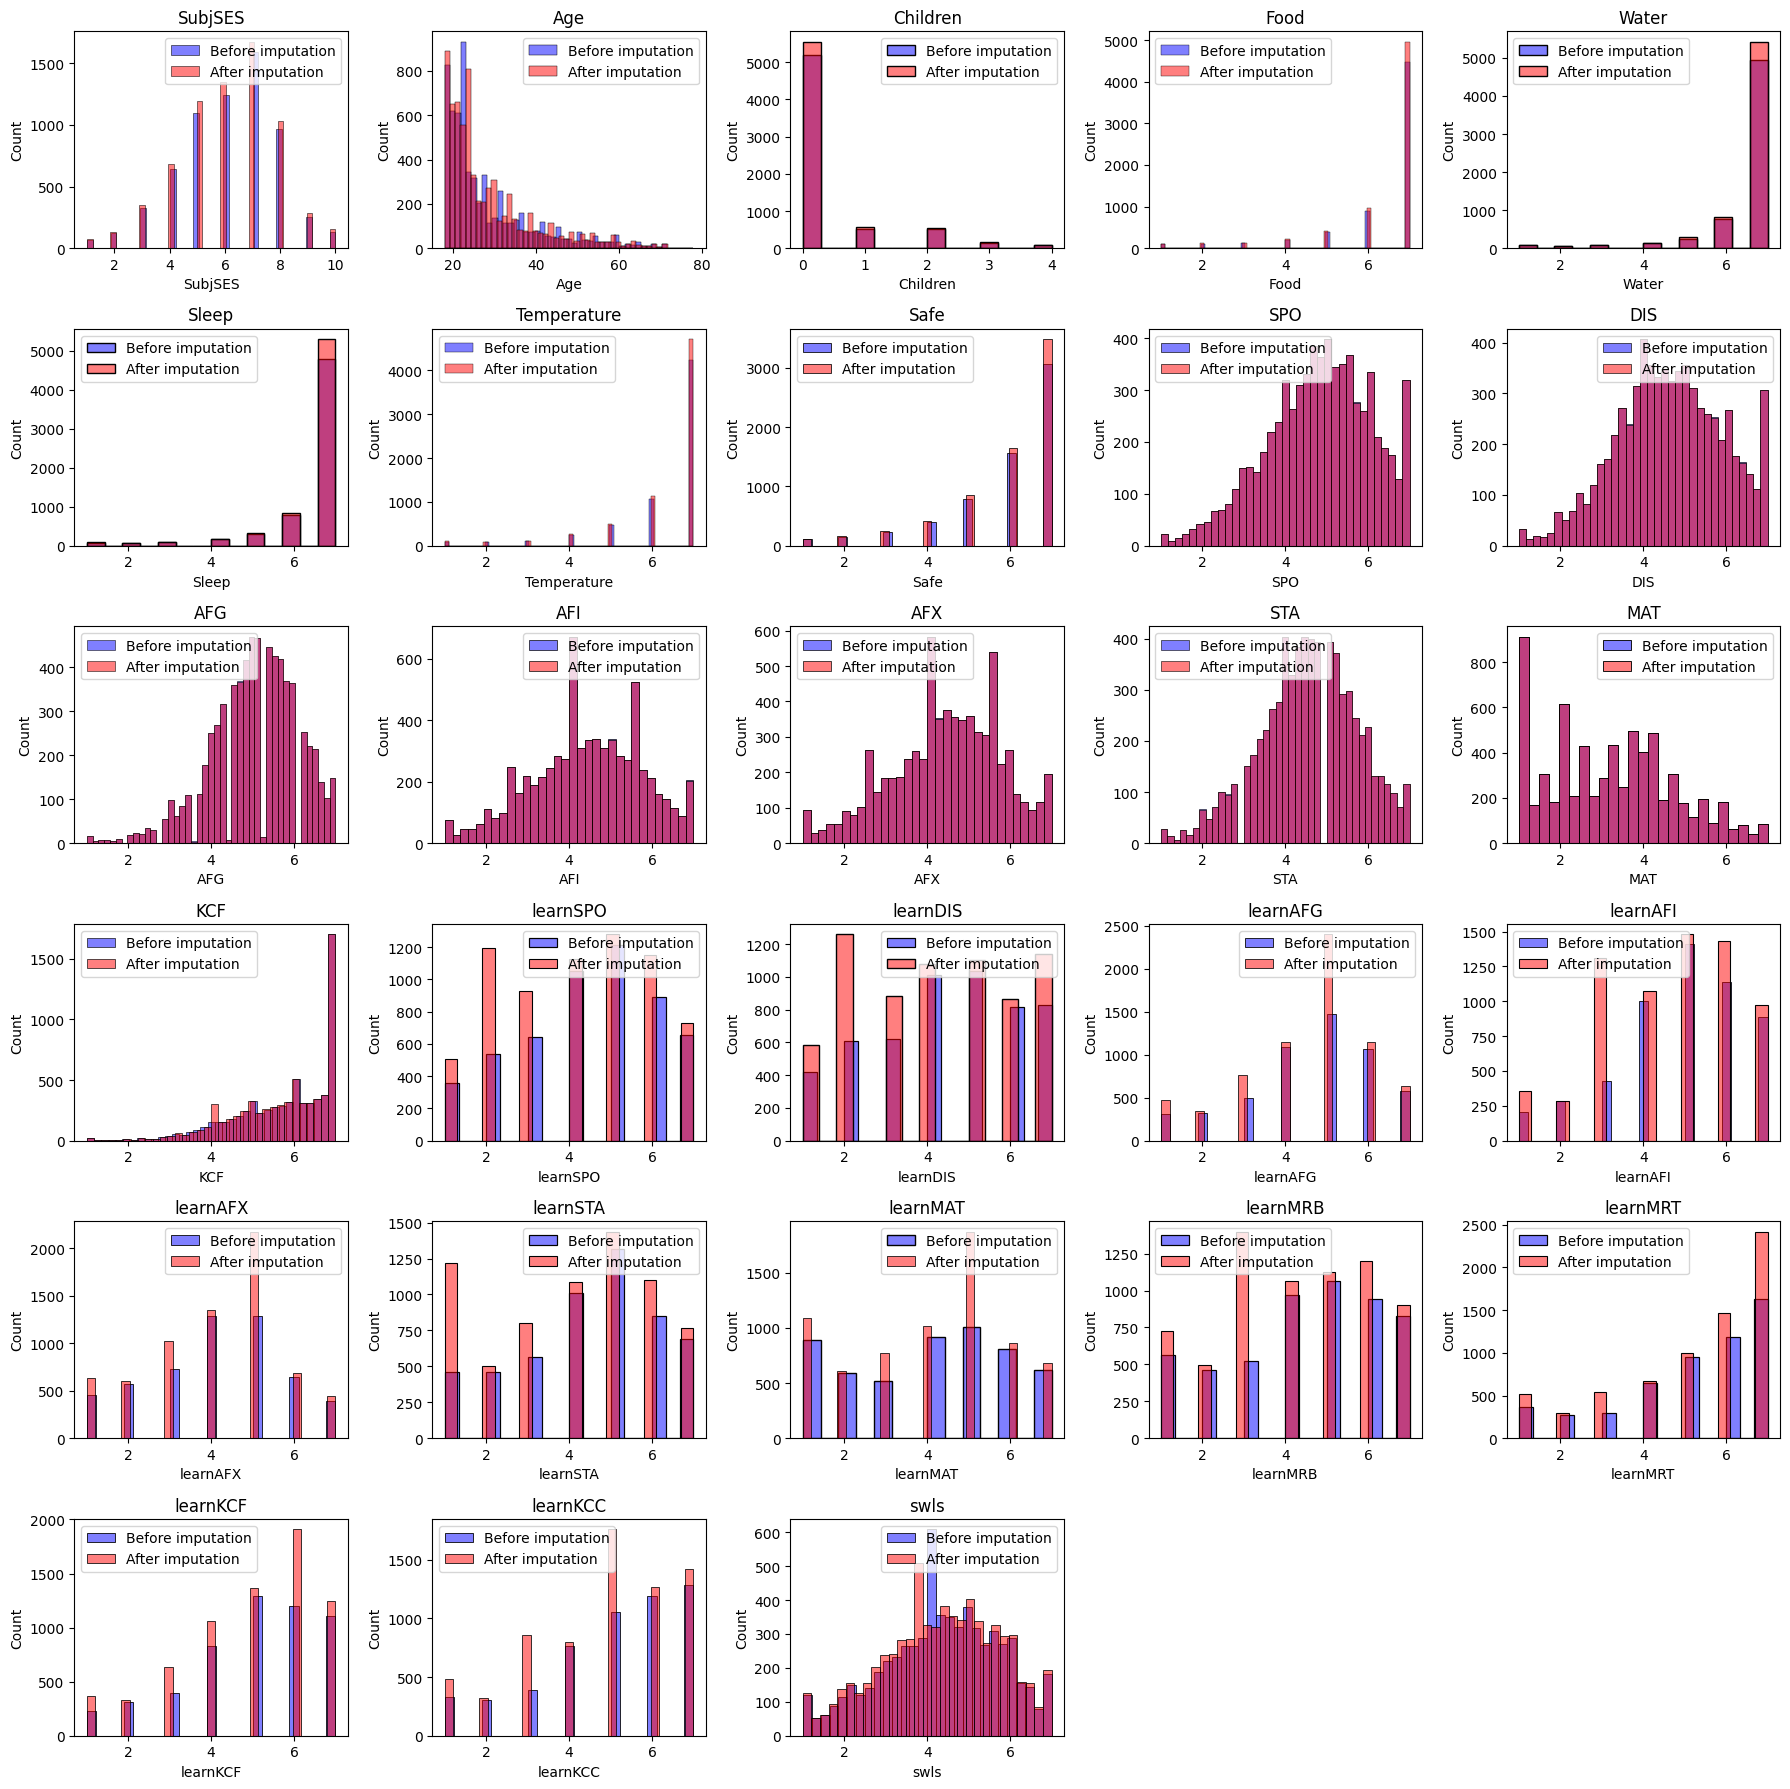

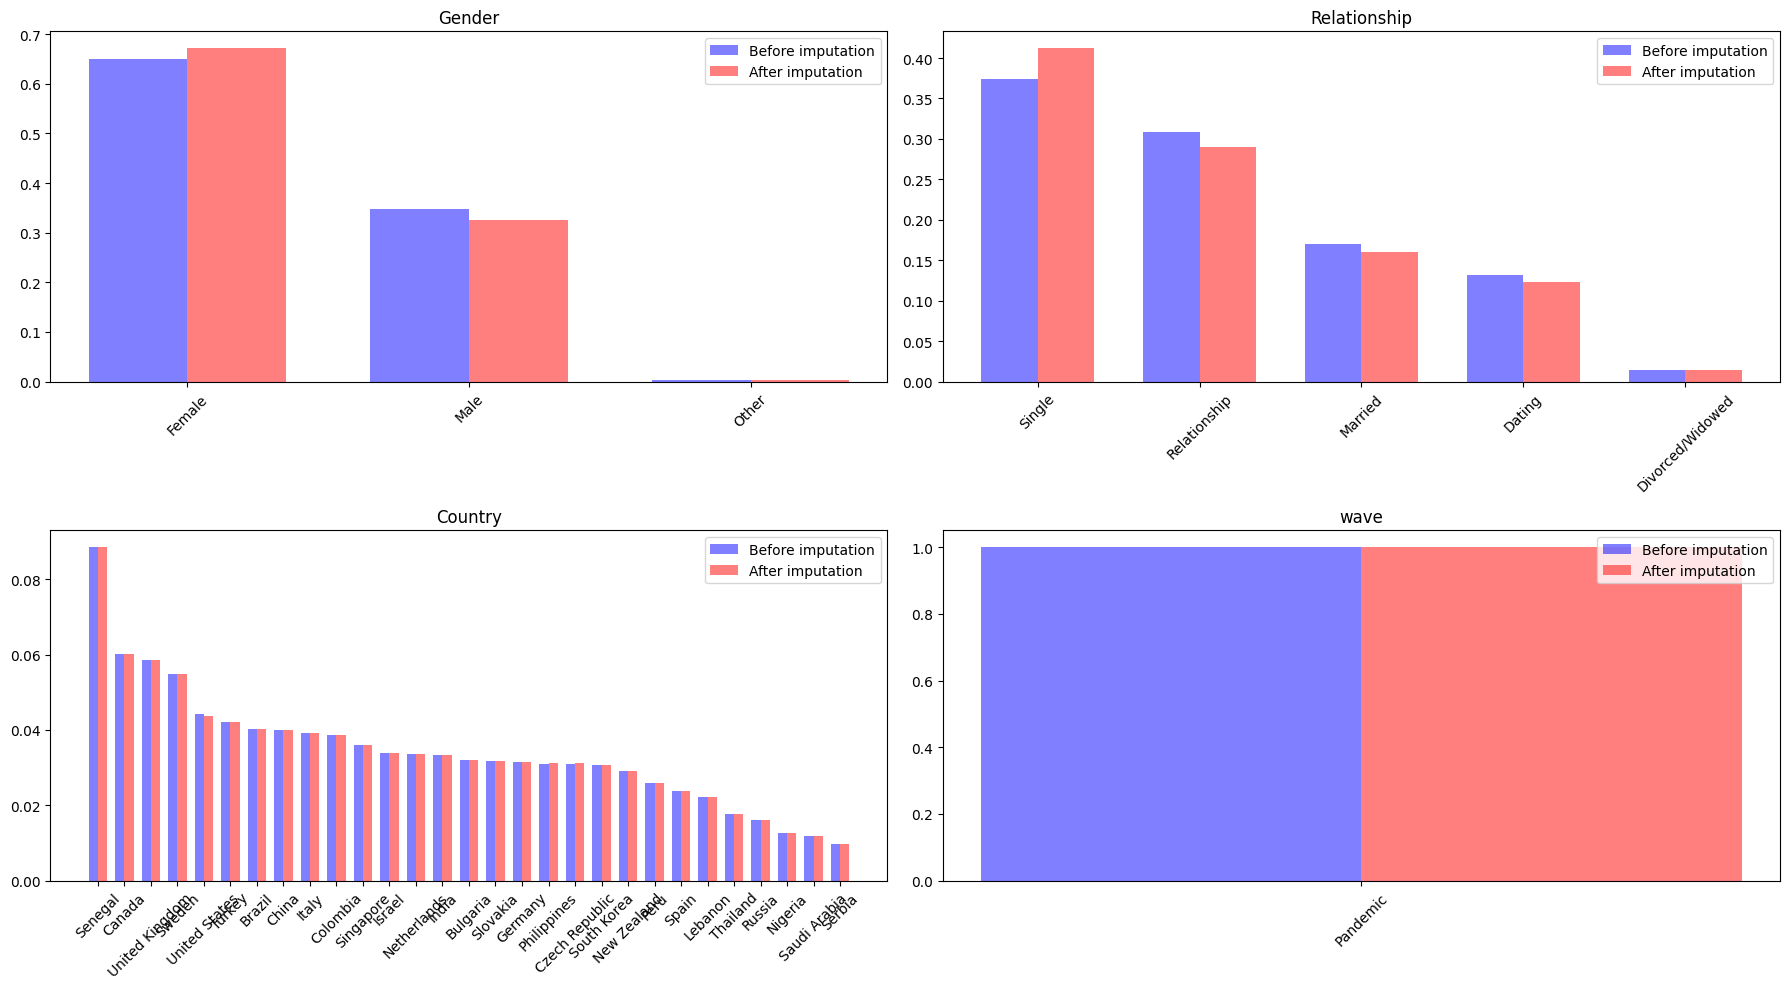

In [ ]:
# To further validate the imputation, I compare the distributions before and after imputation
plt.figure(figsize=(18, 18))

n_vars = len(numerical_vars + [target])
n_rows = int(np.ceil(np.sqrt(n_vars)))
n_cols = int(np.ceil(n_vars / n_rows))

# Plot distributions for numerical variables
for i, var in enumerate(numerical_vars + [target], 1):
    plt.subplot(n_rows, n_cols, i)
    
    sns.histplot(data=df_raw[var], color='blue', alpha=0.5, label='Before imputation')
    
    sns.histplot(data=df_imputed[var], color='red', alpha=0.5, label='After imputation')
    
    plt.title(f'{var}')
    plt.legend()

plt.tight_layout()
plt.show()

# Plot distributions for categorical variables 
plt.figure(figsize=(18, 10))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    
    before_counts = df_raw[var].value_counts(normalize=True)
    after_counts = df_imputed[var].value_counts(normalize=True)
    
    x = range(len(before_counts.index))
    width = 0.35
    
    plt.bar([i - width/2 for i in x], before_counts, width, label='Before imputation', color='blue', alpha=0.5)
    plt.bar([i + width/2 for i in x], after_counts, width, label='After imputation', color='red', alpha=0.5)
    
    plt.title(f'{var}')
    plt.xticks(x, before_counts.index, rotation=45)
    plt.legend()

plt.tight_layout()
plt.show()

# Generally, the distributions before and after imputation are similar, which indicates that the imputation is reasonable.
# considering its larger sample size, I will use the imputed data `df_imputed` for the following analysis.
df=df_imputed

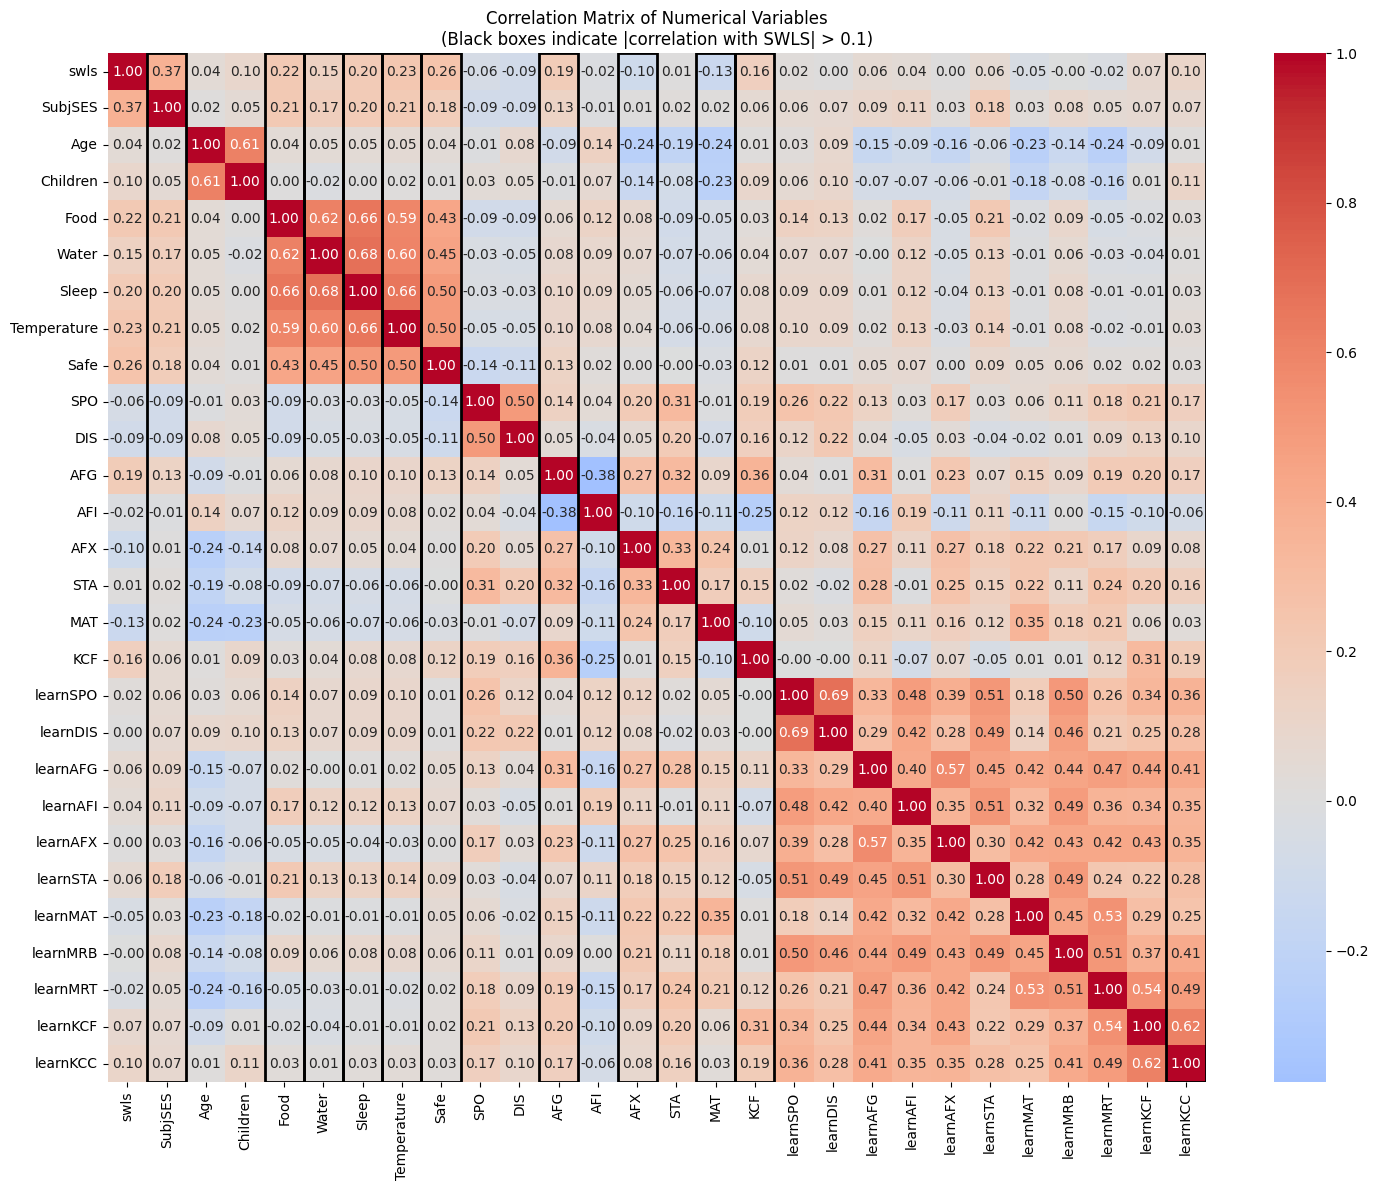

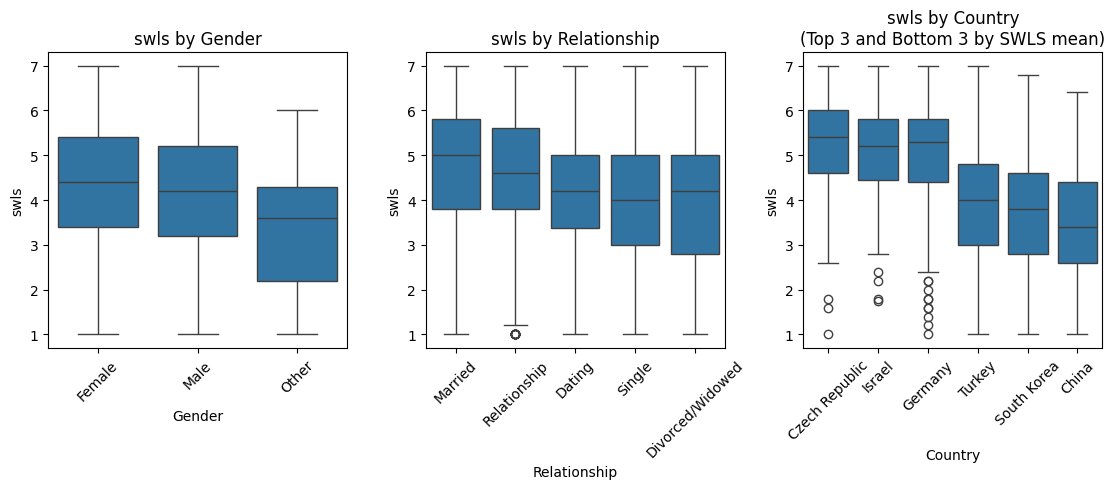

In [ ]:
#numerical variables: correlation with swls
corr_vars = [target] + numerical_vars
corr_matrix = df[corr_vars].corr()

swls_corr = corr_matrix.iloc[0]  # Get correlations with swls
remarkable_vars = swls_corr[abs(swls_corr) > 0.1].index.tolist()
remarkable_vars.remove('swls') 

plt.figure(figsize=(15, 12))
heatmap = sns.heatmap(corr_matrix, 
                      annot=True,   
                      cmap='coolwarm', 
                      center=0,  
                      fmt='.2f') 

# Add rectangles around remarkable correlations
for var in remarkable_vars:
    col_idx = corr_vars.index(var)
    heatmap.add_patch(plt.Rectangle((col_idx, 0), 1, len(corr_vars), fill=False, edgecolor='black', lw=2))
plt.title('Correlation Matrix of Numerical Variables\n(Black boxes indicate |correlation with SWLS| > 0.1)')
plt.tight_layout()
plt.show()

#categorical variables: distribution of swls by categorical values
plt.figure(figsize=(15, 5))
for i, var in enumerate(categorical_vars, 1):
    if var == 'wave':
        continue
    plt.subplot(1, len(categorical_vars), i)
    value_counts = df[var].value_counts()
    if len(value_counts) > 6:
        # Get top 3 and bottom 3 categories based on SWLS mean if there are more than 6 categories
        category_means = df.groupby(var)['swls'].mean().sort_values(ascending=False)
        top_3 = list(category_means.head(3).index)
        bottom_3 = list(category_means.tail(3).index)
        selected_categories = top_3 + bottom_3
        plot_data = df[df[var].isin(selected_categories)].copy()
        plot_data[var] = pd.Categorical(plot_data[var], 
                                      categories=selected_categories,
                                      ordered=True)
    else:
        plot_data = df.copy()
        category_means = plot_data.groupby(var)['swls'].mean().sort_values(ascending=False)
        plot_data[var] = pd.Categorical(plot_data[var],
                                      categories=category_means.index,
                                      ordered=True)
    
    sns.boxplot(x=var, y=target, data=plot_data)
    
    plt.title(f'{target} by {var}\n(Top 3 and Bottom 3 by SWLS mean)' if len(value_counts) > 6 else f'{target} by {var}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# The "swls by country" chart seems to exhibit some coarser differences (Asia is lower than Europe). Therefore, I further plotted the distribution of swls in different countries to see if there are significant differences in swls between larger cultural entities.

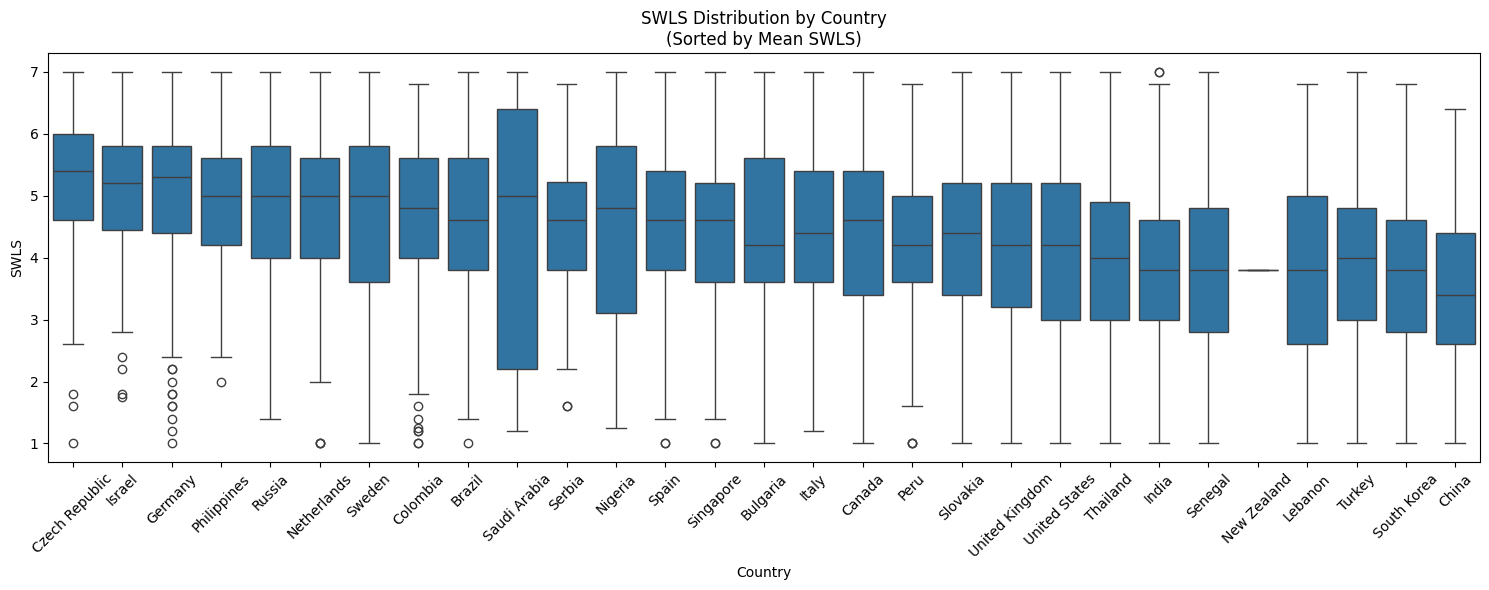


Unique countries in the dataset:
['Bulgaria' 'Brazil' 'Canada' 'China' 'Colombia' 'Czech Republic'
 'Germany' 'Spain' 'United Kingdom' 'India' 'Israel' 'Italy' 'South Korea'
 'Lebanon' 'Nigeria' 'Netherlands' 'New Zealand' 'Peru' 'Philippines'
 'Russia' 'Saudi Arabia' 'Senegal' 'Singapore' 'Serbia' 'Slovakia'
 'Sweden' 'Thailand' 'Turkey' 'United States']


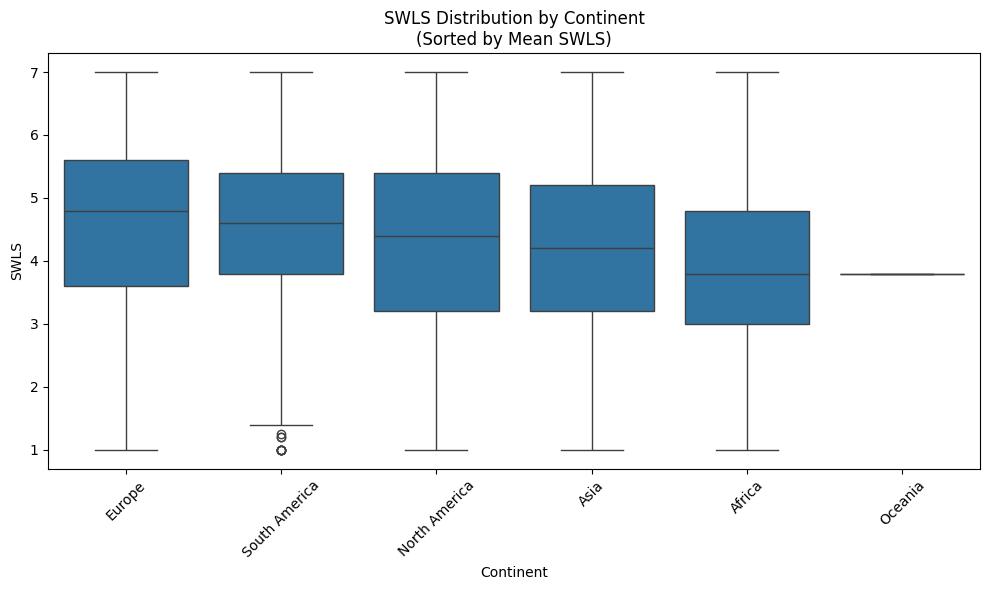

In [ ]:
# boxplot of swls by country (full list, ordered by swls mean)
plt.figure(figsize=(15, 6))

country_means = df.groupby('Country')['swls'].mean().sort_values(ascending=False)

df['Country_ordered'] = pd.Categorical(df['Country'], 
                                     categories=country_means.index,
                                     ordered=True)

sns.boxplot(x='Country_ordered', y='swls', data=df)

plt.title('SWLS Distribution by Country\n(Sorted by Mean SWLS)')
plt.xlabel('Country')
plt.ylabel('SWLS')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print unique countries in the dataset
print("\nUnique countries in the dataset:")
print(df['Country'].unique())


# According to the chart, briefly speaking, there is difference between continents in terms of swls

# map country to continent
def country_to_continent(country):
    continent_map = {
        # Africa
        'Nigeria': 'Africa',
        'Senegal': 'Africa',
        
        # Asia
        'China': 'Asia',
        'India': 'Asia', 
        'Israel': 'Asia',
        'Lebanon': 'Asia',
        'Philippines': 'Asia',
        'Saudi Arabia': 'Asia',
        'Singapore': 'Asia',
        'South Korea': 'Asia',
        'Thailand': 'Asia',
        'Turkey': 'Asia',
        
        # Europe
        'Bulgaria': 'Europe',
        'Czech Republic': 'Europe',
        'Germany': 'Europe',
        'Italy': 'Europe',
        'Netherlands': 'Europe',
        'Russia': 'Europe',
        'Serbia': 'Europe',
        'Slovakia': 'Europe',
        'Spain': 'Europe',
        'Sweden': 'Europe',
        'United Kingdom': 'Europe',
        
        # North America
        'Canada': 'North America',
        'United States': 'North America',
        
        # Oceania
        'New Zealand': 'Oceania',
        
        # South America
        'Brazil': 'South America',
        'Colombia': 'South America',
        'Peru': 'South America'
    }
    return continent_map[country]

df['Continent'] = df['Country'].apply(country_to_continent)

plt.figure(figsize=(10, 6))
continent_means = df.groupby('Continent')['swls'].mean().sort_values(ascending=False)

temp_continent_ordered = pd.Categorical(df['Continent'],
                                      categories=continent_means.index,
                                      ordered=True)

sns.boxplot(x=temp_continent_ordered, y='swls', data=df)

plt.title('SWLS Distribution by Continent\n(Sorted by Mean SWLS)')
plt.xlabel('Continent')
plt.ylabel('SWLS')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Remove columns ending with '_ordered'
ordered_cols = [col for col in df.columns if col.endswith('_ordered')]
df = df.drop(columns=ordered_cols)

In [ ]:
print(df.head(10))   
# Save the DataFrame to a CSV file
df.to_csv('../Dataset/processed_data_socmot.csv', index=False)
print("DataFrame saved successfully to '../Data/processed_data_socmot.csv'")

       swls  SubjSES   Age  Children  Food  Water  Sleep  Temperature  Safe  \
10213   4.8      5.0  19.0       0.0   7.0    7.0    7.0          7.0   7.0   
10214   5.6      4.0  19.0       0.0   7.0    7.0    7.0          7.0   7.0   
10215   6.2      3.0  28.0       0.0   7.0    7.0    7.0          7.0   7.0   
10216   6.2      3.0  28.0       0.0   7.0    7.0    7.0          7.0   7.0   
10217   3.0      7.0  20.0       0.0   7.0    7.0    7.0          5.0   6.0   
10218   2.8      8.0  19.0       0.0   7.0    7.0    7.0          7.0   5.0   
10219   3.8      4.0  19.0       0.0   7.0    7.0    7.0          5.0   6.0   
10220   3.8      4.0  19.0       0.0   7.0    7.0    7.0          5.0   6.0   
10221   1.6      4.0  19.0       0.0   7.0    7.0    7.0          7.0   7.0   
10222   6.2      5.0  19.0       0.0   7.0    7.0    7.0          7.0   7.0   

            SPO  ...  learnMRB  learnMRT  learnKCF  learnKCC  Gender  \
10213  5.166667  ...       3.0       3.0       3.0       3